In [1]:
# General imports
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Data Science
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from analysis_utils import *

In [2]:
labels = ["1:1","1:2","1:4","1:6","1:10","1:25", "1:50", r"1:$10^2$", r"1:$10^3$", r"1:$10^6$"]
costs = np.array([2, 3, 4, 6, 10, 25, 50, 100, 1000, 1000000])
axis_costs = np.arange(1,11,1)
cxlim = [0.8, 10.15]

In [3]:
data = load_results()

## Best result

In [4]:
accepted_results = data[data["recall"] == data["recall"].max()]
accepted_results[accepted_results["precision"] == accepted_results["precision"].max()]

nlp    algorithm  cost_ratio  precision  recall
14  Bigrams  Naive Bayes          10   0.450256       1

## Best results

In [6]:
accepted_results[accepted_results["precision"] > 0.4].sort(["precision"], ascending=False)

nlp    algorithm  cost_ratio  precision  recall
14       Bigrams  Naive Bayes          10   0.450256       1
55   Combination  Naive Bayes          25   0.444199       1
95          None  Naive Bayes          25   0.441965       1
56   Combination  Naive Bayes          50   0.426551       1
15       Bigrams  Naive Bayes          25   0.416640       1
96          None  Naive Bayes          50   0.413989       1
57   Combination  Naive Bayes         100   0.407712       1
16       Bigrams  Naive Bayes          50   0.404563       1
136     Stemming  Naive Bayes          50   0.401889       1

## Best Result by Algorithm

In [7]:
get_best(data, "Naive Bayes")

nlp    algorithm  cost_ratio  precision  recall
14  Bigrams  Naive Bayes          10   0.450256       1

In [8]:
get_best(data, "SVM")

nlp algorithm  cost_ratio  precision    recall
34  Bigrams       SVM          10   0.476494  0.996601

In [9]:
get_best(data, "Random Forest")

nlp      algorithm  cost_ratio  precision    recall
29  Bigrams  Random Forest     1000000   0.726834  0.941569

## Analyzing preprocessing techniques

### Steming vs bigrams vs combination

In [11]:
data1 = data.loc[(data["nlp"] == "Bigrams")]["recall"]
data2 =  data.loc[(data["nlp"] == "Stemming")]["recall"]
data3 =  data.loc[(data["nlp"] == "Combination")]["recall"]

are_different(data1, data2, threshold=0.05, parametric=False)
are_different(data1, data3, threshold=0.05, parametric=False)
are_different(data2, data3, threshold=0.05, parametric=False)

Statistically non-significant different results
Statistically non-significant different results
Statistically non-significant different results


## Analyzing algorithms

### Bayes vs SVM vs Random Forest

In [12]:
data1 = data.loc[(data["algorithm"] == "Random Forest")]["recall"]
data2 =  data.loc[(data["algorithm"] == "Naive Bayes")]["recall"]
data3 =  data.loc[(data["algorithm"] == "SVM")]["recall"]

are_different(data1, data2, threshold=0.001, parametric=False)
are_different(data1, data3, threshold=0.001, parametric=False)
are_different(data2, data3, threshold=0.001, parametric=False)

Statistically significant different results
Statistically significant different results
Statistically significant different results


In [11]:
recalls = []
precisions = []
for m in ["Naive Bayes", "Random Forest", "SVM", "Baseline"]:
    recalls.append(get_best_by_cost(data, "recall", m , "recall"))
    precisions.append(get_best_by_cost(data, "recall", m , "precision"))

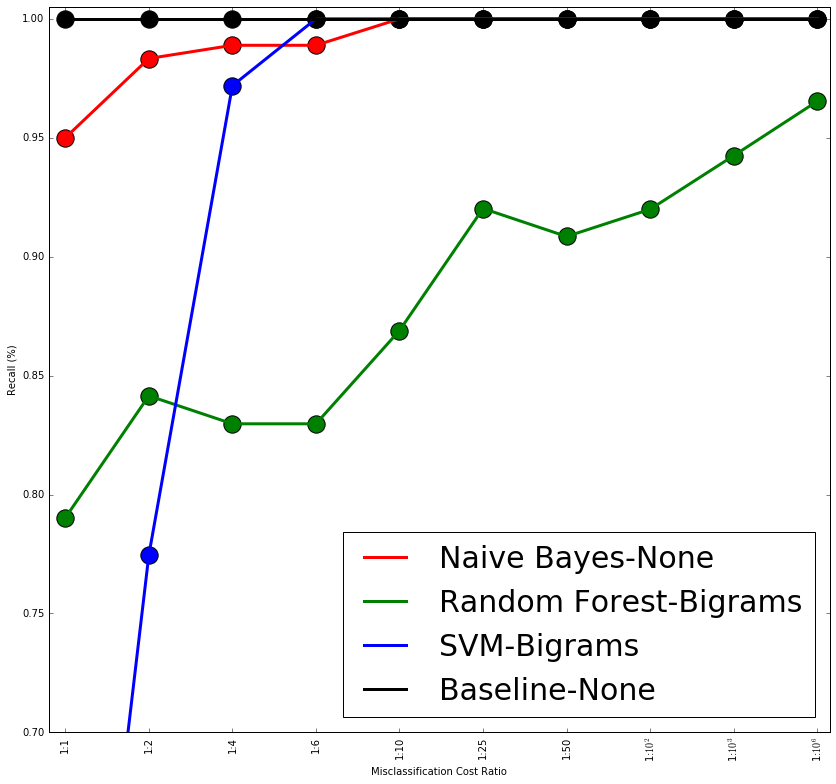

In [12]:
plot_image(axis_costs, recalls, title="RECALL", ylim = [0.70, 1.005], 
           xlim = cxlim, file_name="recall", labels=labels, ylabel="Recall (%)", 
           loc='lower righ', markers="<Do|")

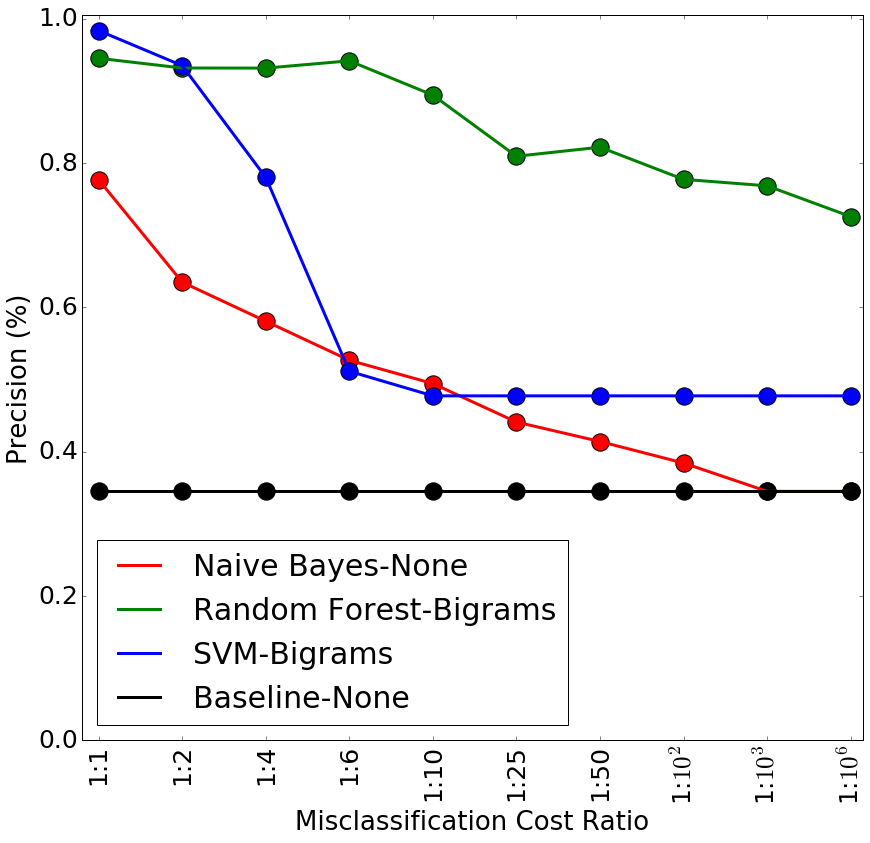

In [13]:
plot_image(axis_costs, precisions, title="RECALL", ylim = [0., 1.005], 
           xlim = cxlim, file_name="precision", labels=labels, ylabel="Precision (%)", 
           loc='lower righ', markers="<Do|")

In [13]:
algorithm = "Random Forest"
nlp = "Stemming"
important_metric = "recall"

conf_data = data.loc[(data["algorithm"] == algorithm) & (data["nlp"] == nlp)]
conf_data[conf_data["recall"] == conf_data["recall"].max()]

nlp      algorithm  cost_ratio  precision    recall
149  Stemming  Random Forest     1000000   0.784803  0.913725

In [4]:
are_different(data, 'nlp', 'precision')
print("=" * 30)
are_different(data, 'nlp', 'recall')

Bigrams 0.565229414925
Combination 0.579524036944
None 0.594184679165
Stemming 0.593977068812

Statistically significant different results between Bigrams and Combination
Statistically significant different results between Bigrams and None
Statistically significant different results between Bigrams and Stemming
Statistically significant different results between Combination and None
Statistically significant different results between Combination and Stemming
Statistically NON-significant different results between None and Stemming
Bigrams 0.948811270446
Combination 0.953037578315
None 0.953062089831
Stemming 0.951653592885

Statistically NON-significant different results between Bigrams and Combination
Statistically NON-significant different results between Bigrams and None
Statistically NON-significant different results between Bigrams and Stemming
Statistically NON-significant different results between Combination and None
Statistically NON-significant different results between Combi

In [5]:
are_different(data, 'algorithm', 'precision')
print("=" * 30)
are_different(data, 'algorithm', 'recall')

Baseline 0.344986438751
Naive Bayes 0.483235811666
Random Forest 0.846004219353
SVM 0.658688730076

Statistically significant different results between Baseline and Naive Bayes
Statistically significant different results between Baseline and Random Forest
Statistically significant different results between Baseline and SVM
Statistically significant different results between Naive Bayes and Random Forest
Statistically significant different results between Naive Bayes and SVM
Statistically significant different results between Random Forest and SVM
Baseline 1.0
Naive Bayes 0.991554734409
Random Forest 0.888191176057
SVM 0.92681862101

Statistically significant different results between Baseline and Naive Bayes
Statistically significant different results between Baseline and Random Forest
Statistically significant different results between Baseline and SVM
Statistically significant different results between Naive Bayes and Random Forest
Statistically significant different results between 